# Introduction to Portfolio Theory: Risk Measures #

After studying benchmarks, Nancy concluded that she was somewhat fortunate to have chosen Nvidia stock as her first investment. Now, she wants to invest in an ETF because she believes it can help her maintain a medium-to-long-term investment strategy, as she is not ready for daily trading. Nancy wants to be more careful when choosing an ETF, so she compares three ETFs (SPY, IWY, and SPXL) and their risks.

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import norm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data

In [2]:
tickers = get_tickers(mod="1.3")

tickers

['SPY', 'IYW', 'SPXL']

In [3]:
# DataFrame to store everything
data = pd.DataFrame()

for ticker in tickers:
    df = get_market_data(
        ticker=ticker, 
        start_date='2010-01-01', 
        end_date='2025-01-01', 
        returns=True
    )
    
    returns = df['returns'].rename(ticker)
    
    data = pd.concat([data, returns], axis=1)
    
    print(f'Data Ready for {ticker}')

Data Ready for SPY
Data Ready for IYW
Data Ready for SPXL


In [4]:
data

,SPY,IYW,SPXL
2010-01-05 00:00:00,0.002643,-0.001540,0.009376
2010-01-06 00:00:00,0.000704,-0.007045,0.002689
2010-01-07 00:00:00,0.004212,-0.003801,0.011744
2010-01-08 00:00:00,0.003322,0.007588,0.010558
2010-01-11 00:00:00,0.001396,-0.004822,0.003844
...,...,...,...
2024-12-24 00:00:00,0.011054,0.010028,0.030746
2024-12-26 00:00:00,0.000067,0.000363,0.000055
2024-12-27 00:00:00,-0.010582,-0.014983,-0.032044
2024-12-30 00:00:00,-0.011477,-0.012101,-0.035386


The conceptual foundations and formulas of the forward concepts are presented in Section 2 of this module’s PDF. We highly recommend reading them before continuing with this notebook.

In [5]:
# 1. Annualized Volatility (Standard Deviation)
volatility = data.std() * np.sqrt(252)

print("Annualized Volatility:\n")
print(volatility)

Annualized Volatility:

SPY     0.171008
IYW     0.222889
SPXL    0.519193
dtype: float64


In [24]:
# 1.5 Annualized Variance (Standard Deviation)
variance = data.var() * 252

print("Annualized Variance:\n")
print(variance)

Annualized Variance:

SPY     0.029244
IWY     0.035060
SPXL    0.269561
dtype: float64


In [25]:
# 2. Covariance Matrix
covariance = data.cov() * 252  # Annualized

print("Covariance Matrix:\n")
print(covariance)

Covariance Matrix:

           SPY       IWY      SPXL
SPY   0.029244  0.030468  0.088618
IWY   0.030468  0.035060  0.092289
SPXL  0.088618  0.092289  0.269561


In [26]:
# 3. Correlations
correlations = data.corr()

print("Correlation Matrix:\n")
print(correlations)

Correlation Matrix:

           SPY       IWY      SPXL
SPY   1.000000  0.951522  0.998112
IWY   0.951522  1.000000  0.949321
SPXL  0.998112  0.949321  1.000000


In [27]:
# 4. Value at Risk
confidence_level = 0.95

z_score = norm.ppf(1 - confidence_level)

VaR_95 = data.mean() + z_score * data.std()
VaR_95 = VaR_95 * np.sqrt(252)  # Annualized

print("Annualized Value at Risk (VaR) at 95% confidence level:\n")
print(VaR_95)

Annualized Value at Risk (VaR) at 95% confidence level:

SPY    -0.273209
IWY    -0.298141
SPXL   -0.838372
dtype: float64


In [28]:
# Download the Benchmark
benchmark = pd.read_csv(r'..\additional_data\sp500.csv')
benchmark.set_index('date', inplace=True)
benchmark.index = pd.to_datetime(benchmark.index)

benchmark

,sp_500
date,
2010-01-05,0.003111
2010-01-06,0.000545
2010-01-07,0.003993
2010-01-08,0.002878
2010-01-11,0.001745
...,...
2024-12-24,0.010982
2024-12-26,-0.000406
2024-12-27,-0.011117


In [29]:
# Calculate the benchmark returns
benchmark_rets = benchmark['sp_500']

In [30]:
# Calculate the Excess Returns
excess_return = data.subtract(benchmark_rets.squeeze(), axis=0)

excess_return

,SPY,IWY,SPXL
2010-01-05 00:00:00,-0.000467,-0.007893,0.006265
2010-01-06 00:00:00,0.000159,0.002400,0.002143
2010-01-07 00:00:00,0.000219,-0.008046,0.007751
2010-01-08 00:00:00,0.000444,0.000807,0.007680
2010-01-11 00:00:00,-0.000350,0.000826,0.002098
...,...,...,...
2024-12-24 00:00:00,0.000071,0.002675,0.019764
2024-12-26 00:00:00,0.000472,-0.001399,0.000461
2024-12-27 00:00:00,0.000535,-0.003564,-0.020926
2024-12-30 00:00:00,-0.000718,-0.001395,-0.024627


In [31]:
# Now calculate the Tracking Error (which is the Std of the Excess Returns)
tracking_error = excess_return.std() * np.sqrt(252)

print("\nTracking Error:")
print(tracking_error)


Tracking Error:
SPY     0.008943
IWY     0.057734
SPXL    0.346975
dtype: float64


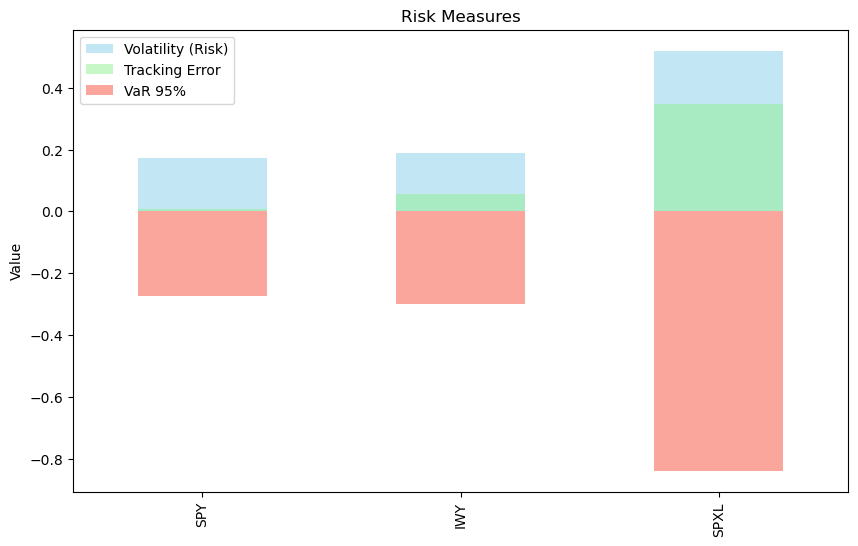

In [32]:
#Let us visualize the Risk Measures
fig, ax = plt.subplots(figsize=(10, 6))
volatility.plot(kind='bar', color='skyblue', label='Volatility (Risk)', alpha=0.5)
tracking_error.plot(kind='bar', color='lightgreen', label='Tracking Error', alpha=0.5)
VaR_95.plot(kind='bar', color='salmon', label='VaR 95%', alpha=0.7)
plt.title('Risk Measures')
plt.ylabel('Value')
plt.legend()
plt.show()

In [33]:
# Naturally, the SPXL is more risky that the other ETFs
mean = data.mean() * 252

print("Annualized Mean Returns:")
print(mean)

Annualized Mean Returns:
SPY     0.128157
IWY     0.156328
SPXL    0.248033
dtype: float64


In [34]:
# Risk Adjusted Returns
eff_ratio = mean/volatility

print("Risk Adjusted Returns:")
print(eff_ratio)

Risk Adjusted Returns:
SPY     0.749426
IWY     0.834888
SPXL    0.477729
dtype: float64


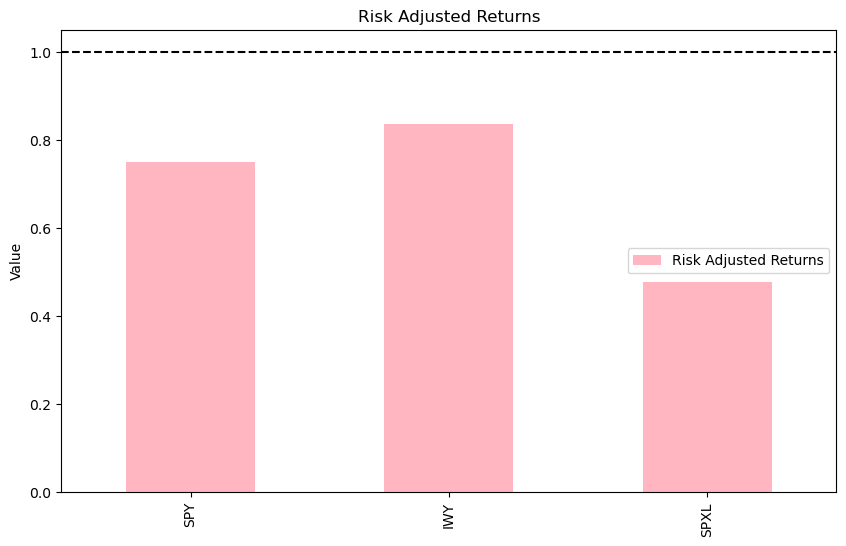

In [35]:
#Let us visualize
fig, ax = plt.subplots(figsize=(10, 6))
eff_ratio.plot(kind='bar', color='lightpink', label='Risk Adjusted Returns')
ax.axhline(y=1, color='black', linestyle='--')
plt.title('Risk Adjusted Returns')
plt.ylabel('Value')
plt.legend()
plt.show()

In [37]:
# Calculate the Risk Adjusted Returns of the Benchmark (Risk Aversion Coefficient)
mean_bench = benchmark_rets.mean() * 252
var_bench = benchmark_rets.var() * 252
eff_rate_bench = mean_bench/var_bench

eff_rate_bench

3.6818051936645007